### Decision Trees and Random Forests

• Previously we have looked in depth at a simple generative classifier (naive Bayes; see In Depth: Naive Bayes Classification) and a powerful discriminative classifier (support vector machines; see In-Depth: Support Vector Machines).

• Here we'll take a look at motivating another powerful algorithm — a non-parametric algorithm called random forests.

• Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators.

• The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting!

• We will see examples of this in the following sections.

• We begin with the standard imports:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Motivating Random Forests: Decision Trees

• Random forests are an example of an ensemble learner built on decision trees.

• For this reason we'll start by discussing decision trees themselves.

• Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.

• For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:

• The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes. 

• The trick, of course, comes in deciding which questions to ask at each step. In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data:

• That is, each node in the tree splits the data into two groups using a cutoff value within one of the features. 

• Let's now look at an example of this.

### Creating a decision tree

• Consider the following two-dimensional data, which has one of four class labels:

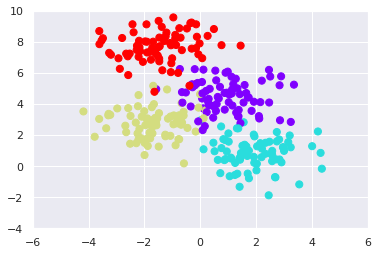

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.xlim(-6, 6)
plt.ylim(-4, 10);

• A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.

• This figure presents a visualization of the first four levels of a decision tree classifier for this data:

• Notice that after the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch.

• Except for nodes that contain all of one color, at each level every region is again split along one of the two features.

• This process of fitting a decision tree to our data can be done in Scikit-Learn with the DecisionTreeClassifier estimator:

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

• Let's write a quick utility function to help us visualize the output of the classifier:

In [19]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax=ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create the color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes+1)-0.5,
                          cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim);

• Now we can examine what the decision tree classification looks like:

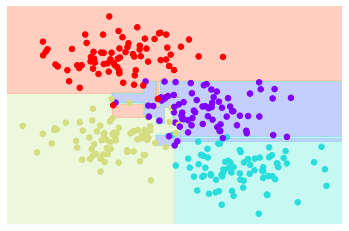

In [20]:
visualize_classifier(DecisionTreeClassifier(), X, y)

• If you're running this notebook live, you can use the helpers script included in The Online Appendix to bring up an interactive visualization of the decision tree building process: